In [1]:
import scanpy as sc
import scFates as scf

In [2]:
adata=sc.read("adata_preprocess.h5ad")

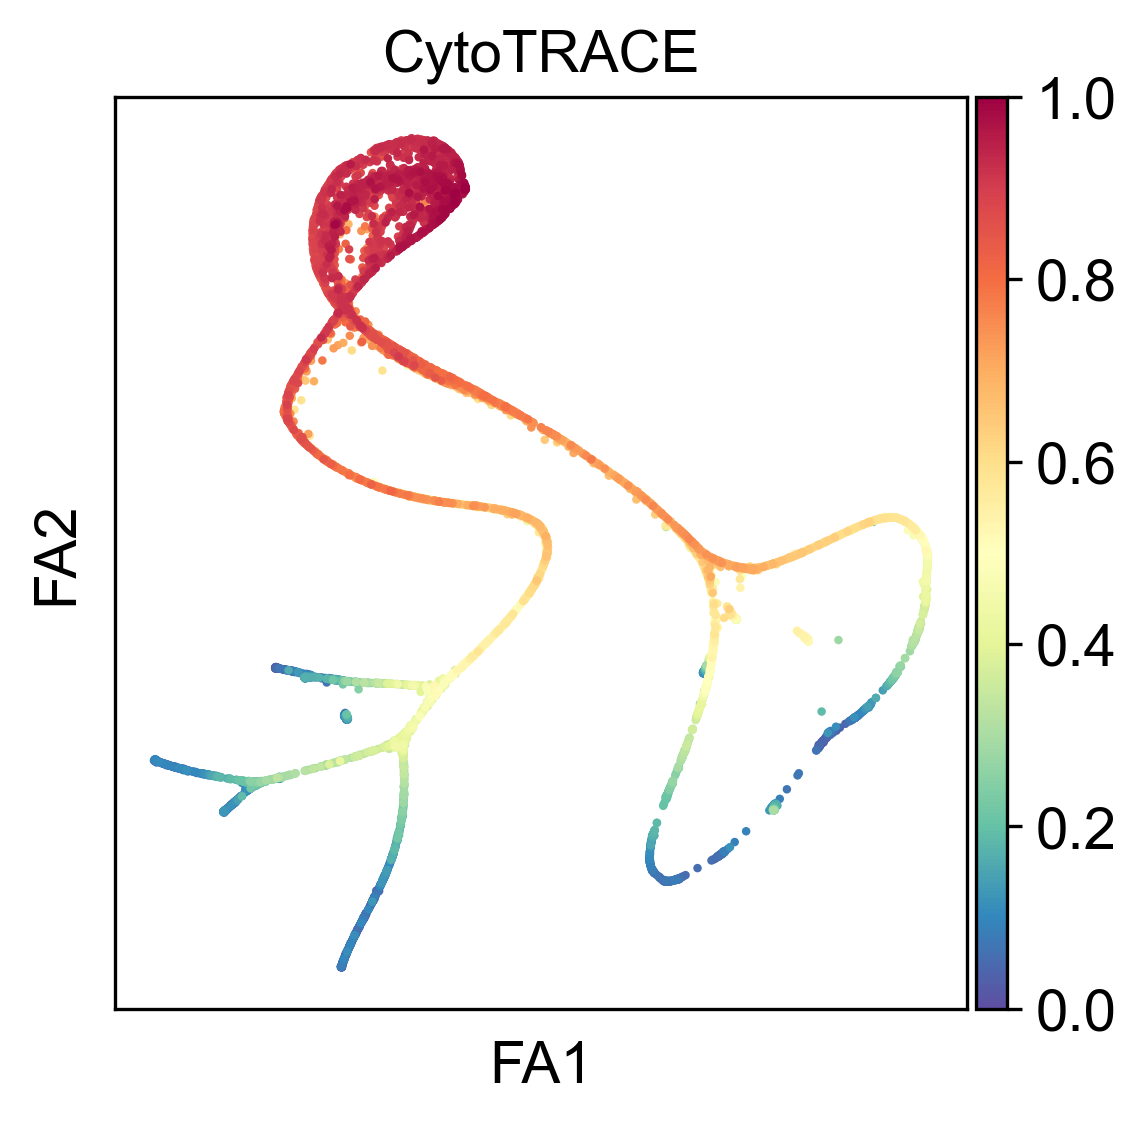

In [3]:
sc.set_figure_params(dpi=150)
sc.pl.draw_graph(adata,color="CytoTRACE",cmap="Spectral_r")

inferring a principal tree inferring a principal tree --> parameters used 
    1000 principal points, sigma = 0.3, lambda = 10, metric = euclidean
    fitting: 100%|██████████| 50/50 [00:04<00:00, 10.99it/s]
    inference not converged (error: 0.0050453592155638)
    finished (0:00:04) --> added 
    .uns['ppt'], dictionnary containing inferred tree.
    .obsm['X_R'] soft assignment of cells to principal points.
    .uns['graph']['B'] adjacency matrix of the principal points.
    .uns['graph']['F'] coordinates of principal points in representation space.


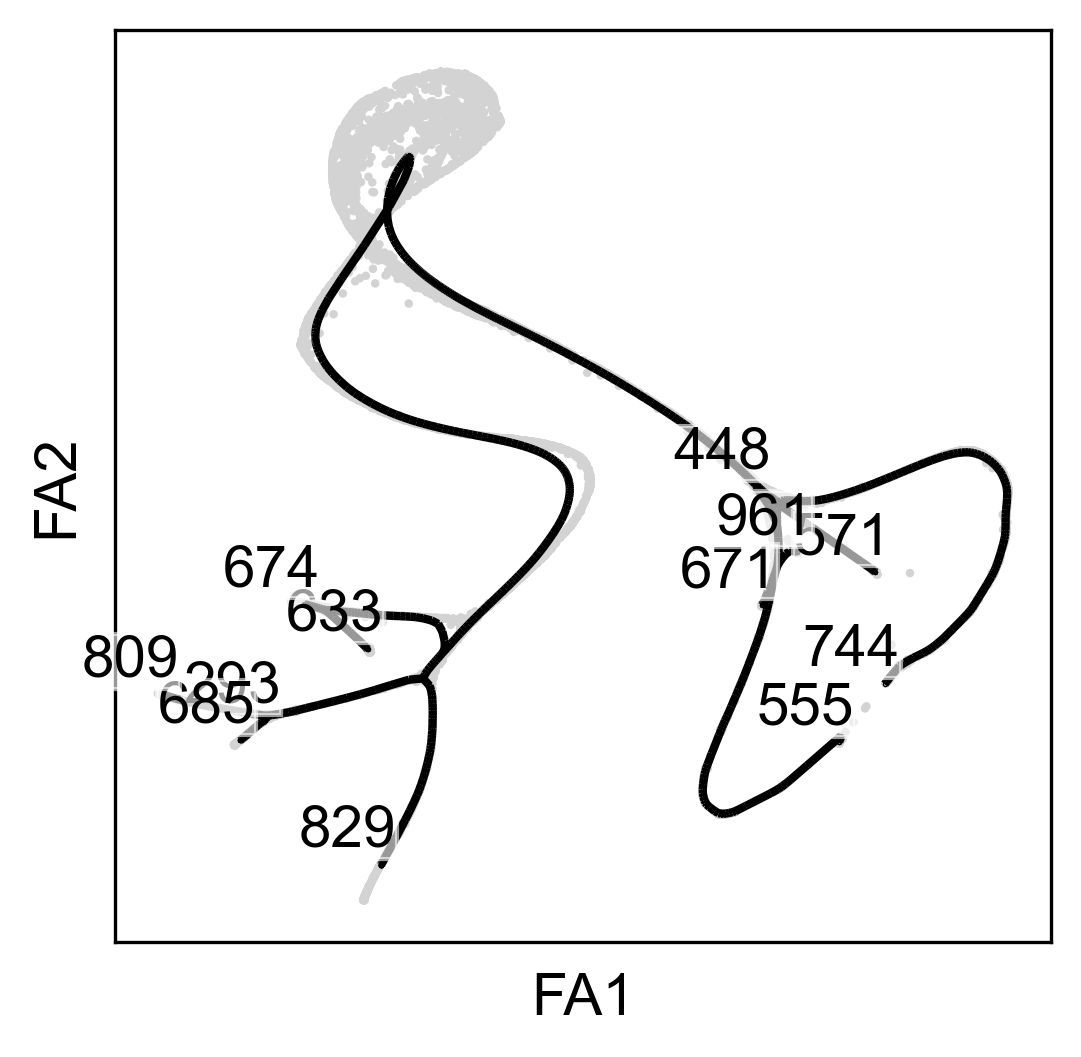

In [11]:
scf.tl.tree(adata,use_rep="X_diffusion_multiscale",device="gpu",ppt_lambda=10,ppt_sigma=.3,
            Nodes=1000,seed=1,method="ppt")
scf.pl.graph(adata,basis="draw_graph_fa",size_nodes=.1,forks=False)

    graph cleaned --> removed 51 principal points


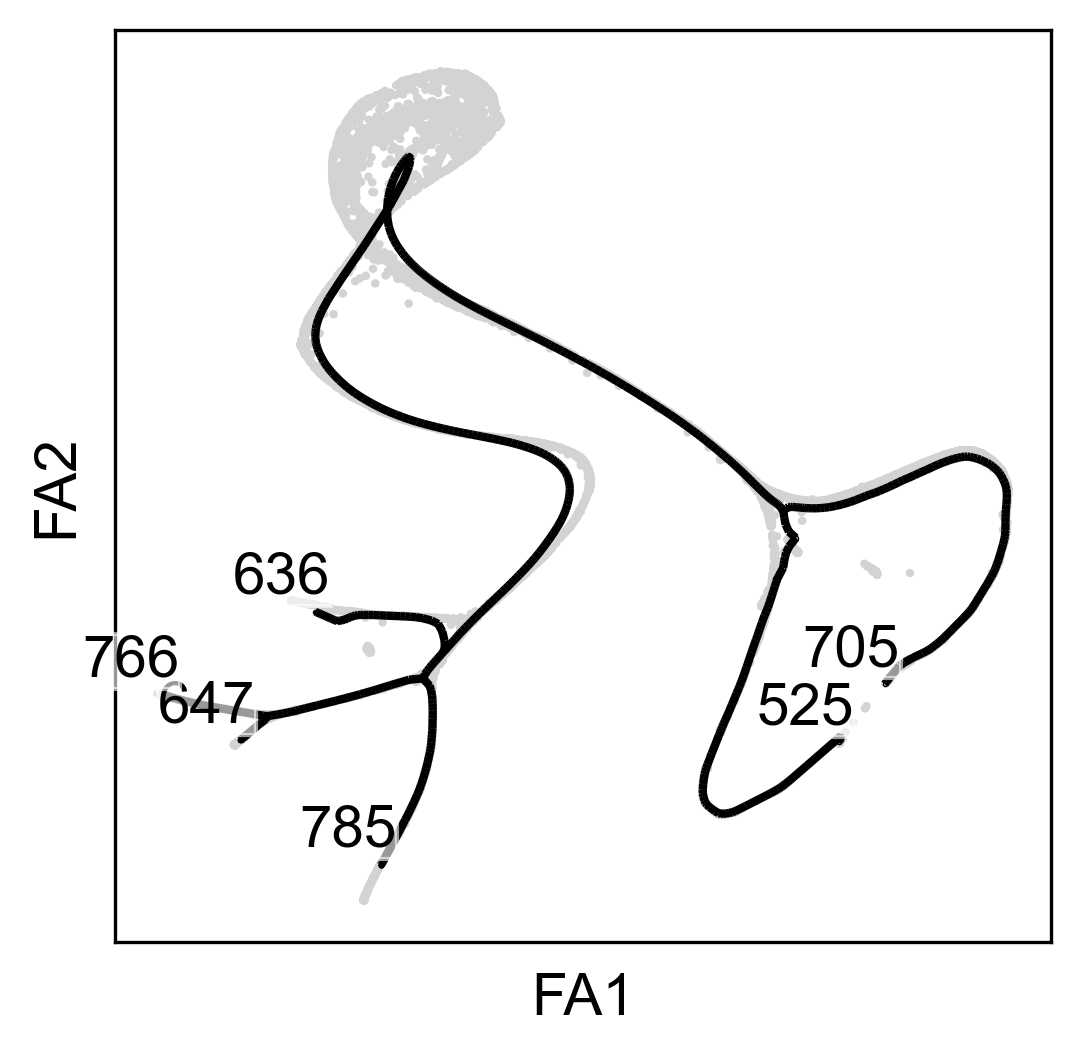

In [12]:
scf.tl.cleanup(adata,minbranchlength=15,leaves=[671])

scf.pl.graph(adata,basis="draw_graph_fa",size_nodes=.1,forks=False)

In [13]:
scf.tl.root(adata,'CytoTRACE')

automatic root selection using CytoTRACE values
node 532 selected as a root --> added
    .uns['graph']['root'] selected root.
    .uns['graph']['pp_info'] for each PP, its distance vs root and segment assignment.
    .uns['graph']['pp_seg'] segments network information.


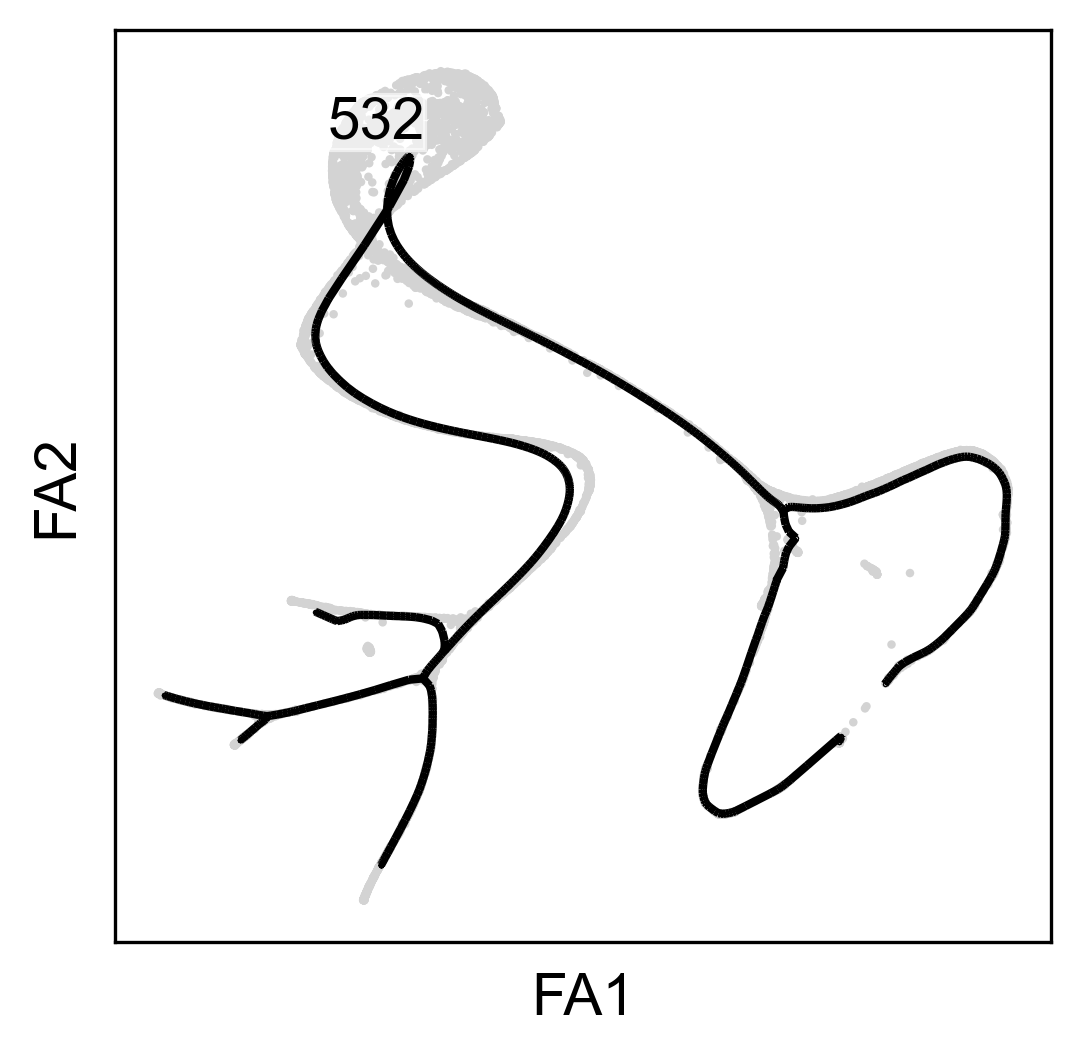

In [14]:
scf.pl.graph(adata,basis="draw_graph_fa",size_nodes=.1,forks=False,tips=False,nodes=[532])

In [15]:
scf.tl.pseudotime(adata,n_jobs=80,n_map=100)

projecting cells onto the principal graph
    mappings: 100%|██████████| 100/100 [01:00<00:00,  1.67it/s]
    finished (0:01:05) --> added
    .obs['edge'] assigned edge.
    .obs['t'] pseudotime value.
    .obs['seg'] segment of the tree assigned.
    .obs['milestones'] milestone assigned.
    .uns['pseudotime_list'] list of cell projection from all mappings.


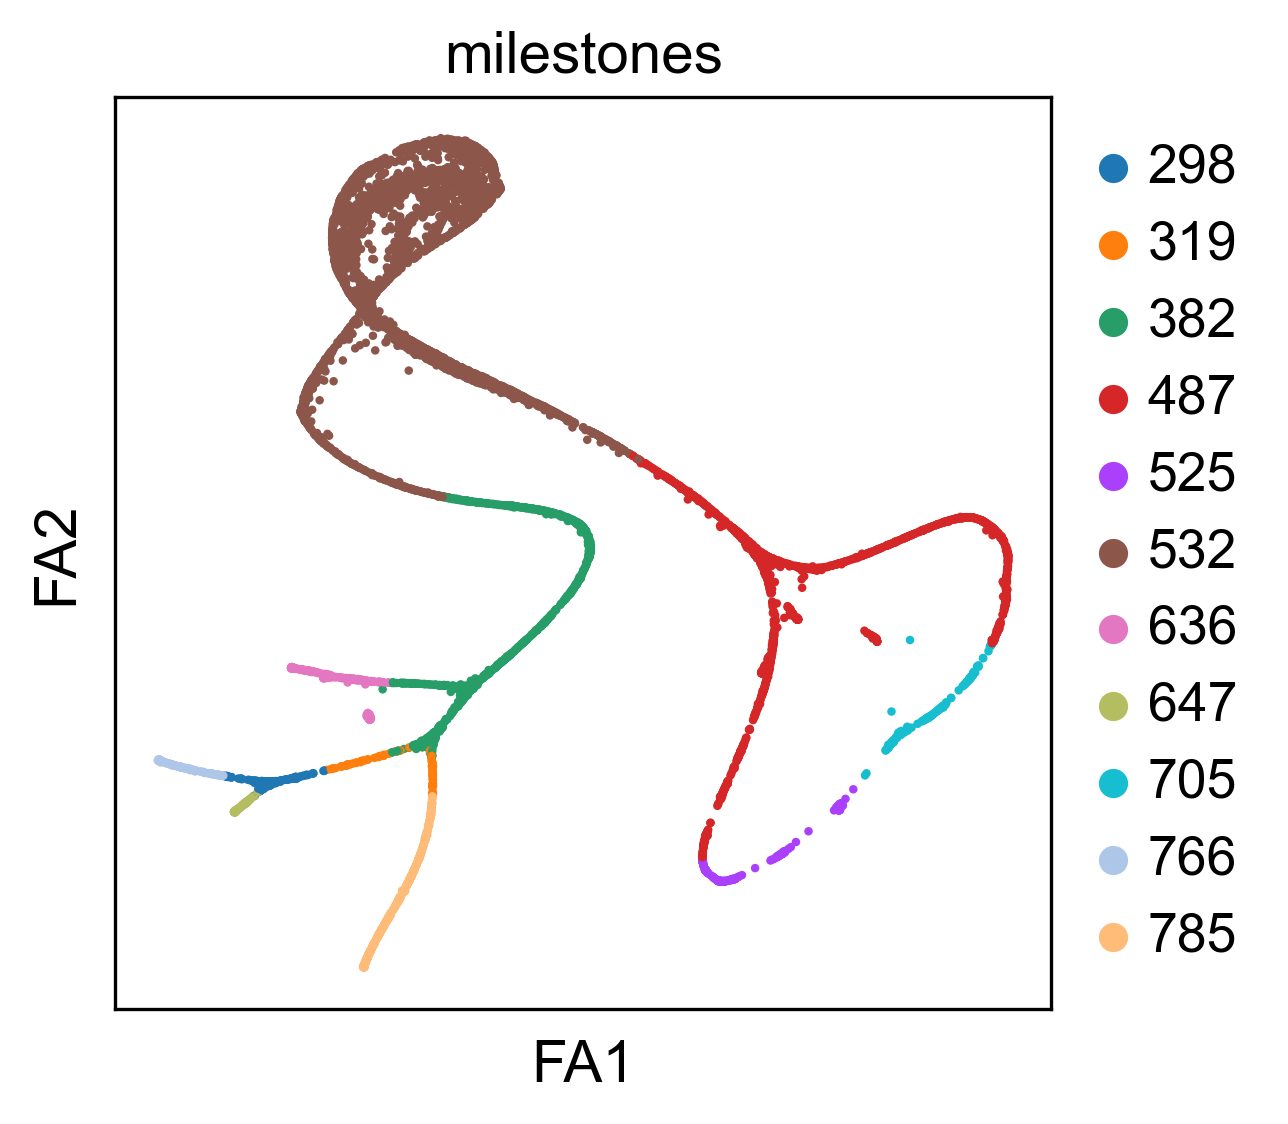

In [16]:
sc.pl.draw_graph(adata,color="milestones")

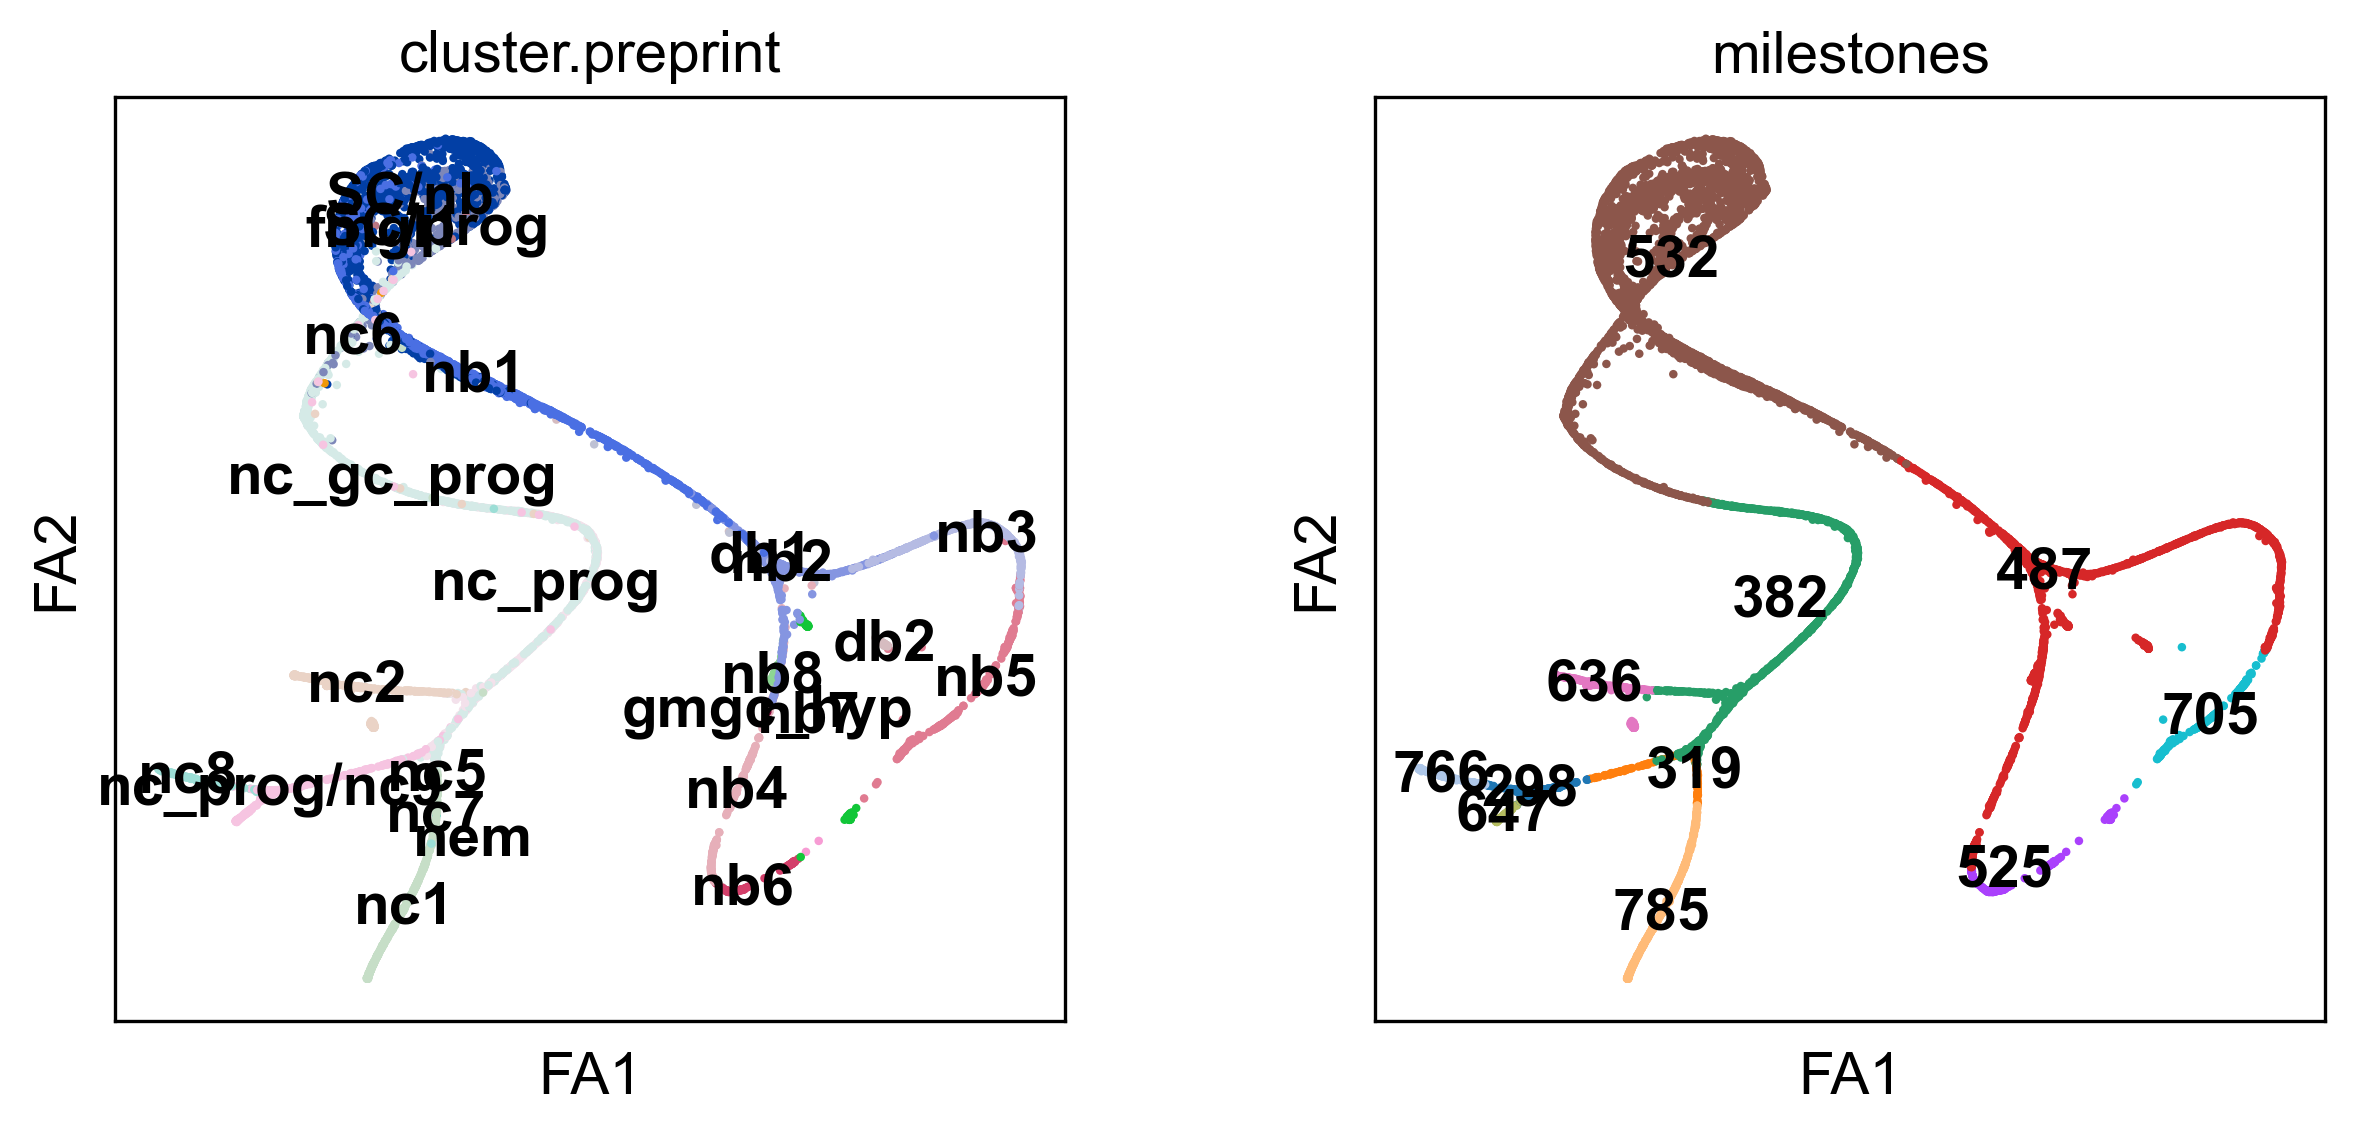

In [21]:
sc.pl.draw_graph(adata,color=["cluster.preprint","milestones"],legend_loc="on data")

In [24]:
adata.uns["graph"]["milestones"]

{'298': 298,
 '319': 319,
 '382': 382,
 '487': 487,
 '525': 525,
 '532': 532,
 '636': 636,
 '647': 647,
 '705': 705,
 '766': 766,
 '785': 785}

In [25]:
scf.tl.rename_milestones(adata,["nc_prog_C","nc_prog_B","nc_prog_A","nb_prog","nb6","Progenitors","nc2","nc9","nb5","nc8","nc1"])

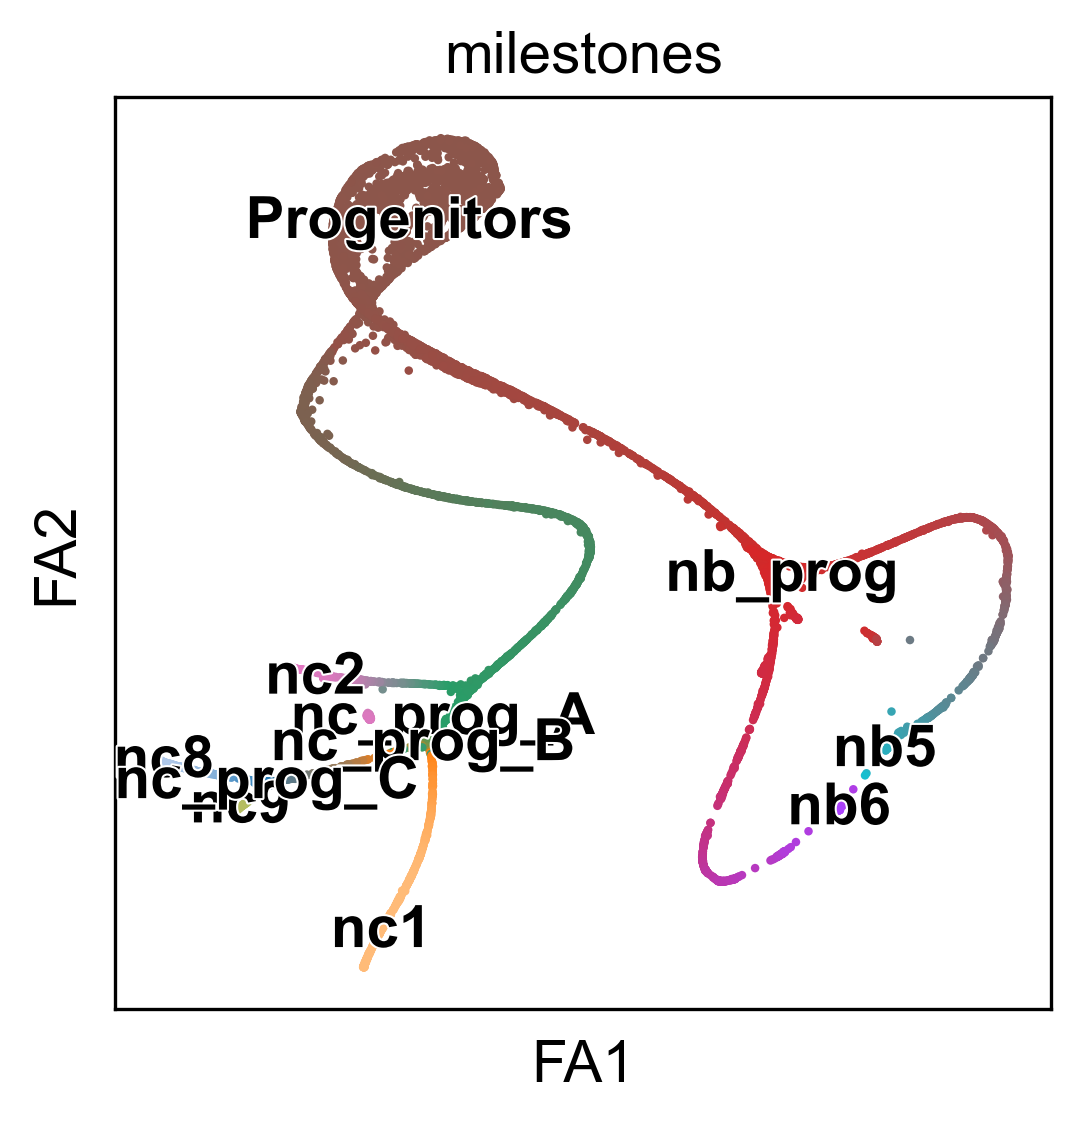

In [27]:
scf.pl.milestones(adata,annotate=True)

In [28]:
adata=adata.raw.to_adata()

In [29]:
sc.pp.normalize_total(adata,target_sum=1e6)
sc.pp.log1p(adata,base=10)

In [30]:
sc.pp.filter_genes(adata,min_cells=3)

In [31]:
scf.tl.test_association(adata,n_jobs=40)

test features for association with the trajectory
    single mapping : 100%|██████████| 22897/22897 [07:17<00:00, 52.36it/s]
    found 3927 significant features (0:07:17) --> added
    .var['p_val'] values from statistical test.
    .var['fdr'] corrected values from multiple testing.
    .var['st'] proportion of mapping in which feature is significant.
    .var['A'] amplitue of change of tested feature.
    .var['signi'] feature is significantly changing along pseudotime.
    .uns['stat_assoc_list'] list of fitted features on the graph for all mappings.


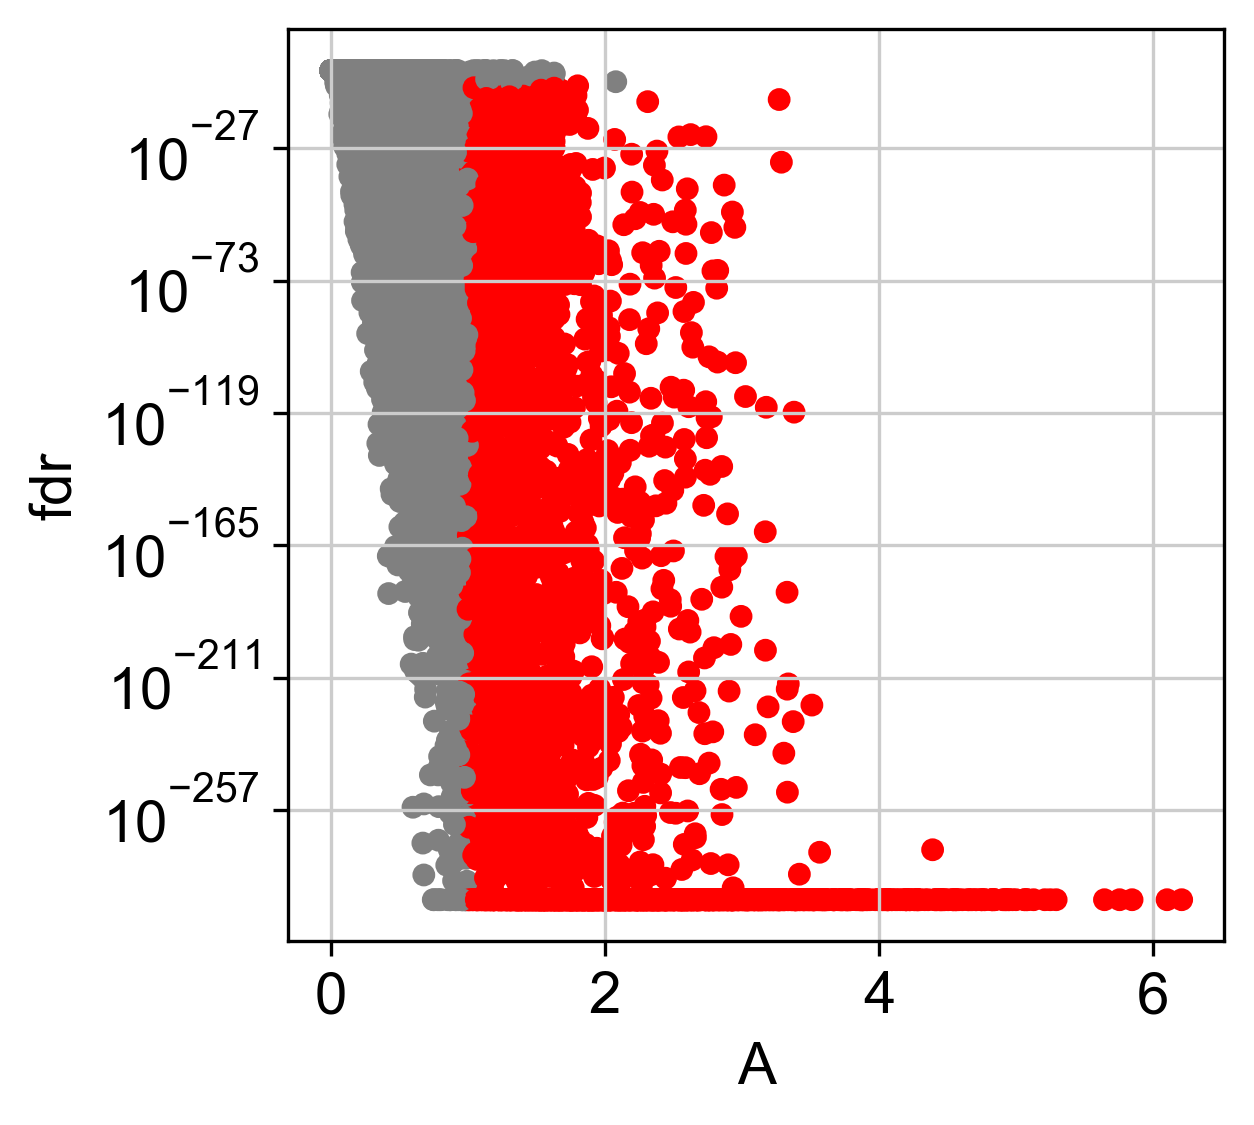

In [32]:
scf.pl.test_association(adata)

In [33]:
scf.tl.fit(adata,n_jobs=40)

fit features associated with the trajectory
    single mapping : 100%|██████████| 3927/3927 [03:02<00:00, 21.47it/s]
    finished (adata subsetted to keep only fitted features!) (0:03:13) --> added
    .layers['fitted'], fitted features on the trajectory for all mappings.
    .raw, unfiltered data.


In [34]:
adata.write("adata_tree.h5ad")